In [71]:
import requests
from PIL import Image
from PIL import ImageDraw

In [72]:
subscription_key = '0d144fee129a4997a0c155d4de3ab421'

In [73]:
assert subscription_key

In [74]:
face_api_url = 'https://20211228aking.cognitiveservices.azure.com/face/v1.0/detect'

In [75]:
with open('IMG_2546.JPG', 'rb') as f:
    binary_img = f.read()

In [76]:
headers = {
    'Content-Type': 'application/octet-stream',
    'Ocp-Apim-Subscription-Key': subscription_key
}
params = {
    'returnFaceId': 'true',
    'returnFaceAttributes': 'smile,headPose,gender,age,facialHair,glasses,emotion,blur,exposure,noise,makeup,accessories,occlusion,hair'
}
res = requests.post(face_api_url, params=params, headers=headers, data=binary_img)

In [77]:
result = res.json()

In [83]:
result

[{'faceId': '0ae5290c-f047-4647-8aea-22d81029dfc8',
  'faceRectangle': {'top': 464, 'left': 608, 'width': 318, 'height': 318},
  'faceAttributes': {'smile': 0.864,
   'headPose': {'pitch': -1.3, 'roll': 2.4, 'yaw': 6.7},
   'gender': 'female',
   'age': 56.0,
   'facialHair': {'moustache': 0.0, 'beard': 0.0, 'sideburns': 0.0},
   'glasses': 'ReadingGlasses',
   'emotion': {'anger': 0.0,
    'contempt': 0.001,
    'disgust': 0.0,
    'fear': 0.0,
    'happiness': 0.864,
    'neutral': 0.117,
    'sadness': 0.001,
    'surprise': 0.016},
   'blur': {'blurLevel': 'medium', 'value': 0.45},
   'exposure': {'exposureLevel': 'goodExposure', 'value': 0.63},
   'noise': {'noiseLevel': 'low', 'value': 0.21},
   'makeup': {'eyeMakeup': False, 'lipMakeup': True},
   'accessories': [{'type': 'glasses', 'confidence': 0.99}],
   'occlusion': {'foreheadOccluded': False,
    'eyeOccluded': False,
    'mouthOccluded': False},
   'hair': {'bald': 0.13,
    'invisible': False,
    'hairColor': [{'color': 

In [85]:
rect = result[0]['faceRectangle']
rect

{'top': 464, 'left': 608, 'width': 318, 'height': 318}

In [48]:
img = Image.open('IMG_2546.JPG')

In [49]:
draw = ImageDraw.Draw(img)

In [50]:
# draw.line([(rect['left'], rect['top']),(rect['left'] + rect['width'], rect['top']) ,(rect['left'] + rect['width'], rect['top'] + rect['height']), (rect['left'], rect['top'] + rect['height']), (rect['left'], rect['top'])], fill='red', width=5)

In [51]:
draw.rectangle([(rect['left'], rect['top']), (rect['left'] + rect['width'], rect['top'] + rect['height'])], fill=None, outline='green', width=5)

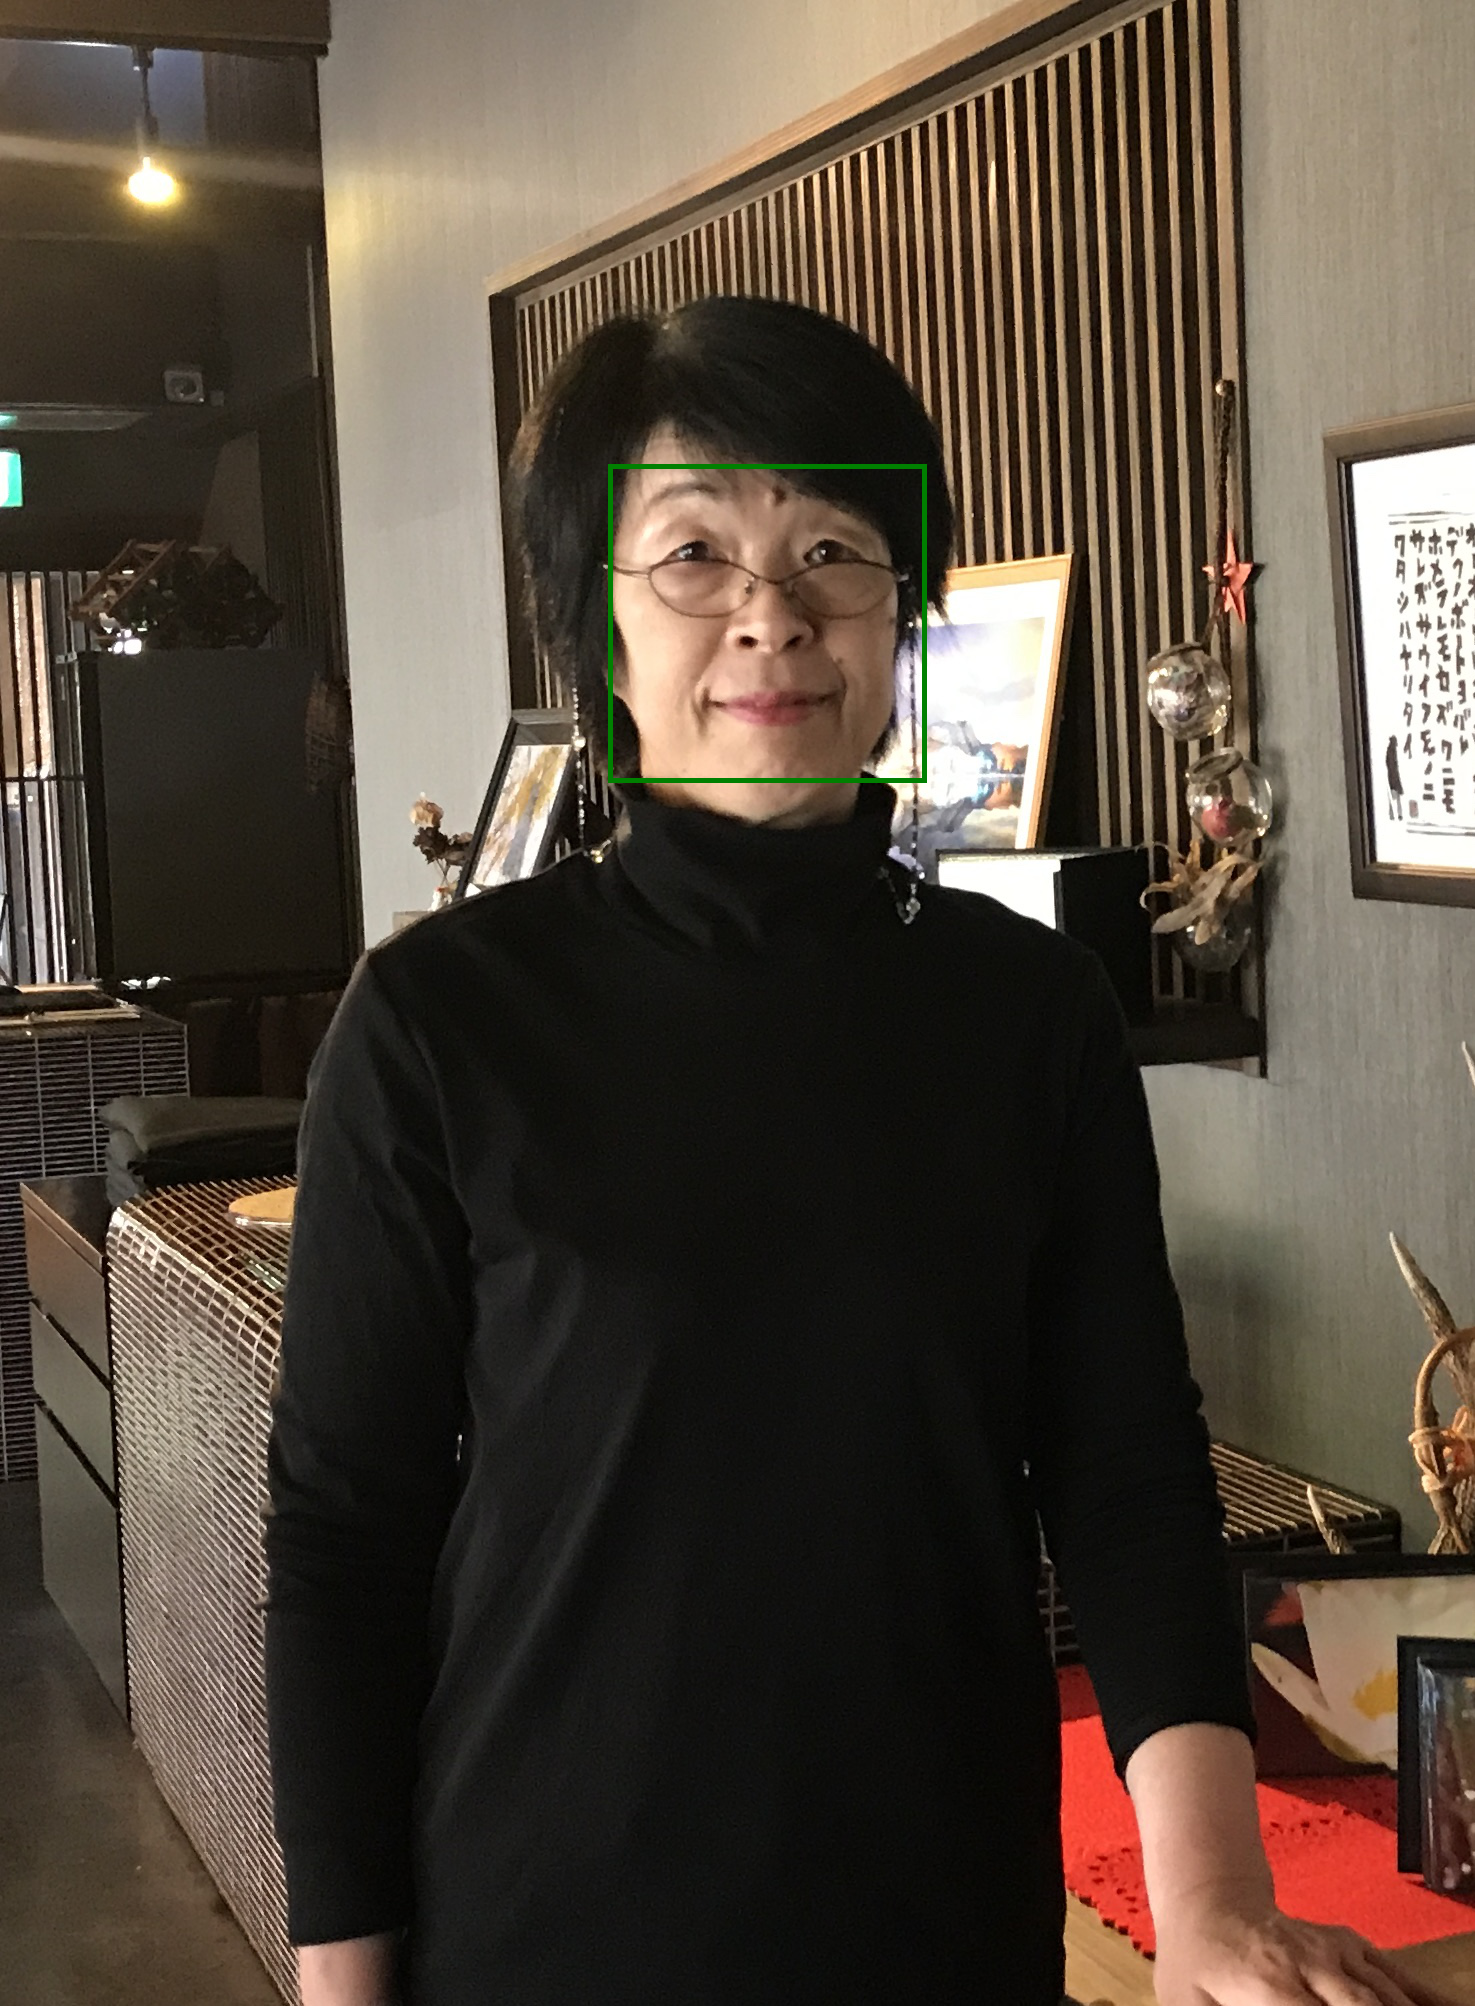

In [52]:
img

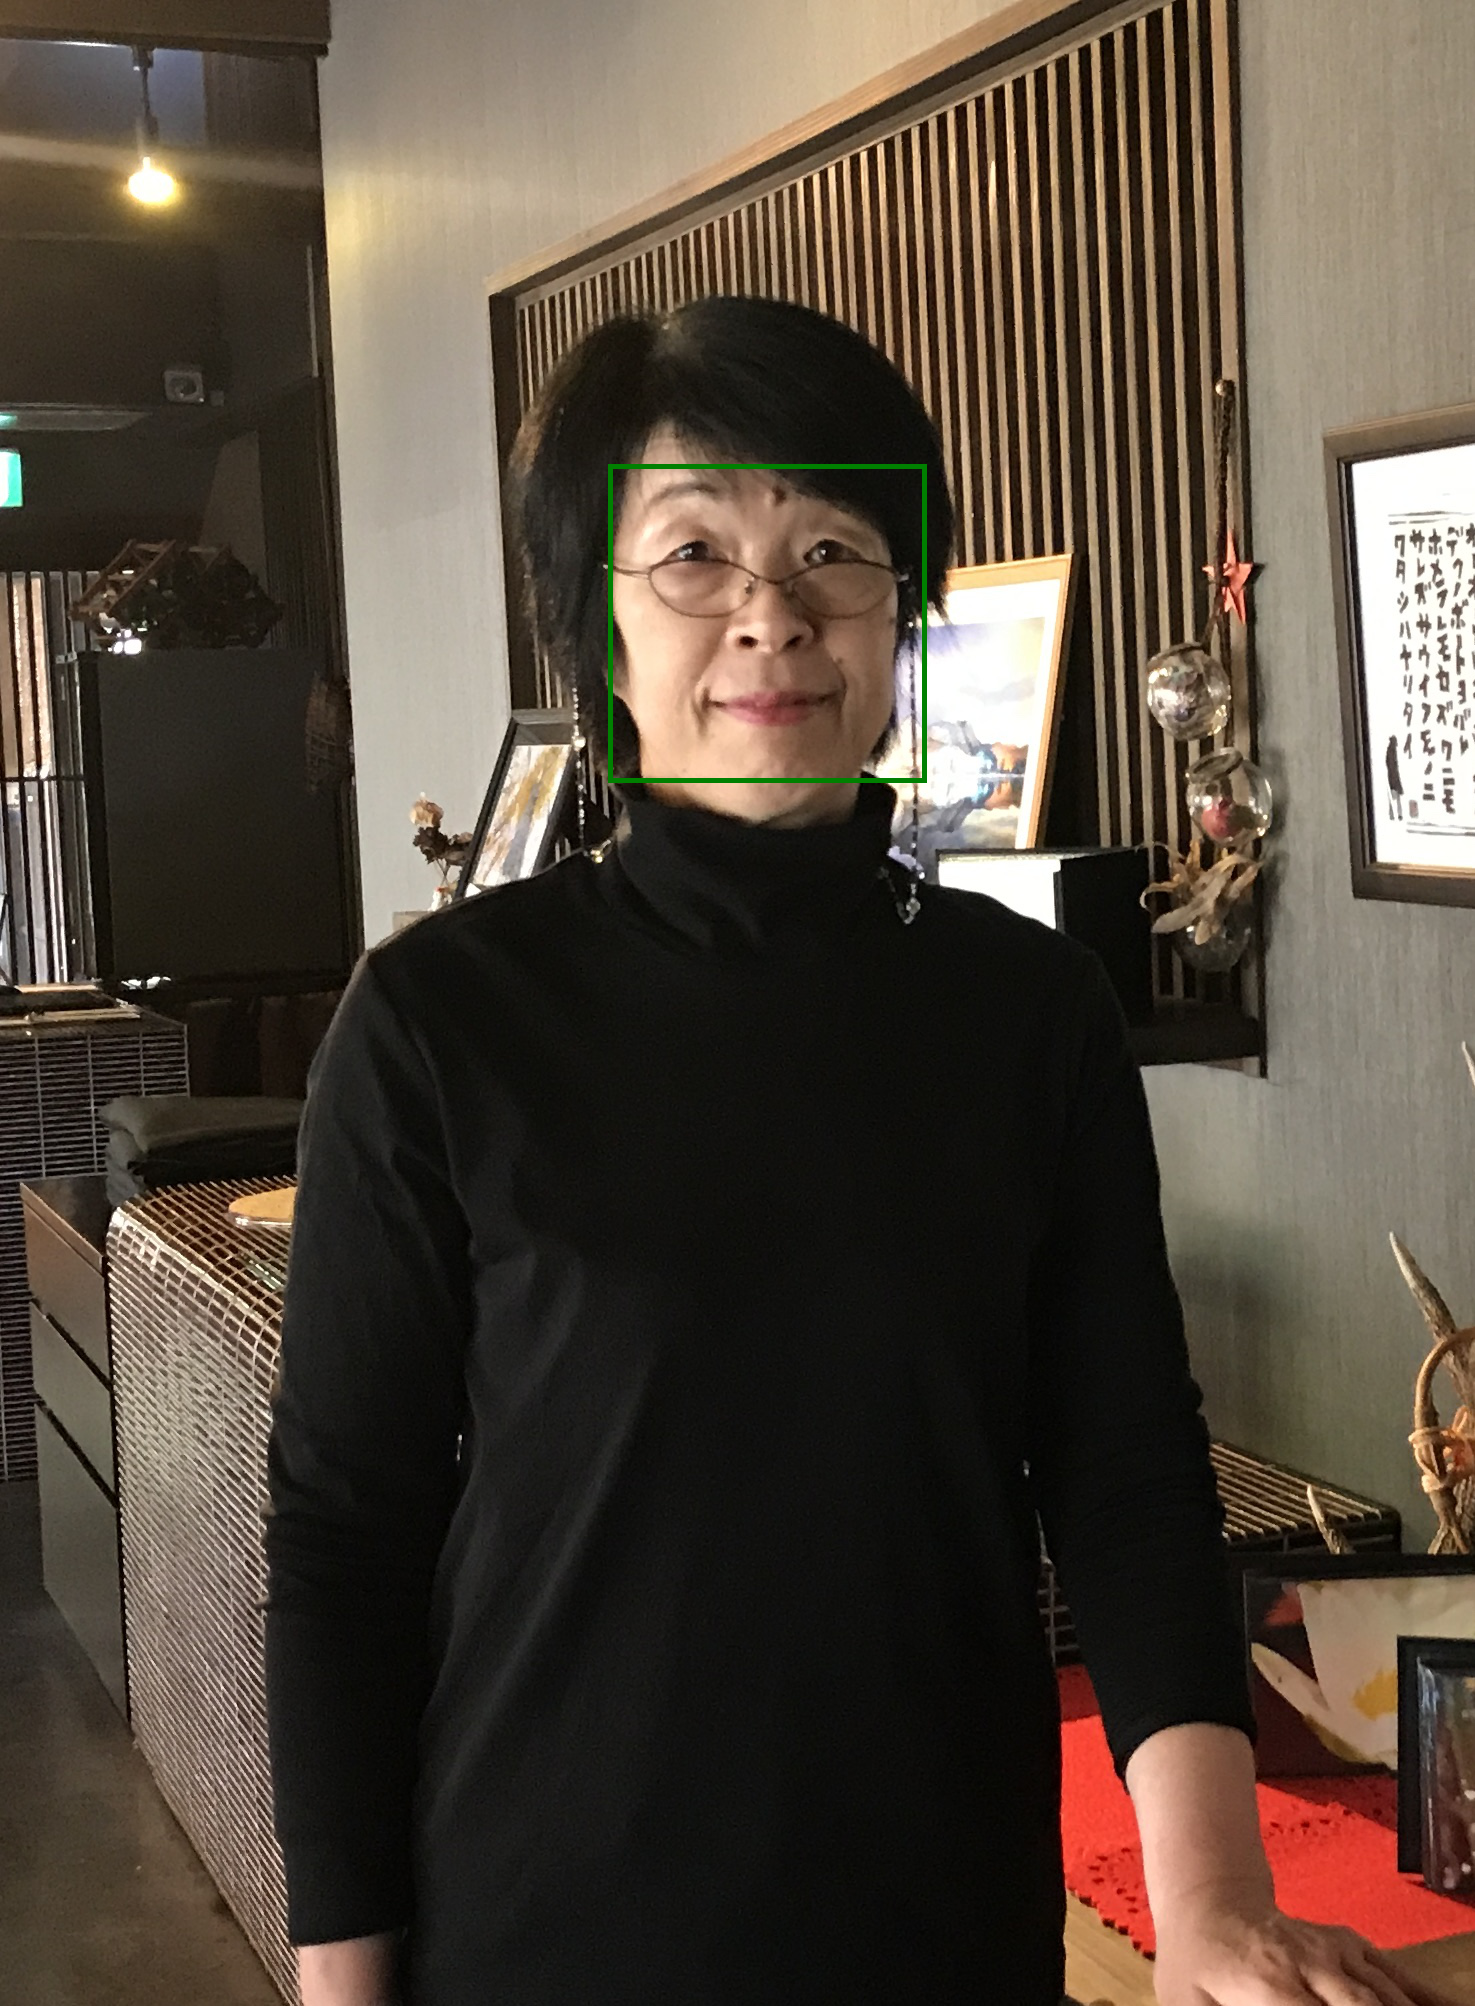

In [89]:
import requests
from PIL import Image
from PIL import ImageDraw

subscription_key = '0d144fee129a4997a0c155d4de3ab421'
assert subscription_key
face_api_url = 'https://20211228aking.cognitiveservices.azure.com/face/v1.0/detect'
with open('IMG_2546.JPG', 'rb') as f:
    binary_img = f.read()
headers = {
    'Content-Type': 'application/octet-stream',
    'Ocp-Apim-Subscription-Key': subscription_key
}
params = {
    'returnFaceId': 'true',
    'returnFaceAttributes': 'smile,headPose,gender,age,facialHair,glasses,emotion,blur,exposure,noise,makeup,accessories,occlusion,hair'
}
res = requests.post(face_api_url, params=params, headers=headers, data=binary_img)
results = res.json()
img = Image.open('IMG_2546.JPG')
for result in results:
    rect = result['faceRectangle']
    draw = ImageDraw.Draw(img)
    draw.rectangle([(rect['left'], rect['top']), (rect['left'] + rect['width'], rect['top'] + rect['height'])], fill=None, outline='green', width=5)
img

In [57]:
with io.BytesIO() as output:
    img.save(output, format="JPEG")
    binary_img = output.getvalue()